In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [2]:
df=pd.read_csv("C:/Users/ASHRITHA/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Very basic overview of the dataset

# Mean Age
df['Age'].mean()

# Check the dataset balance
df.groupby('Attrition')['EmployeeCount'].count()

Attrition
No     1233
Yes     237
Name: EmployeeCount, dtype: int64

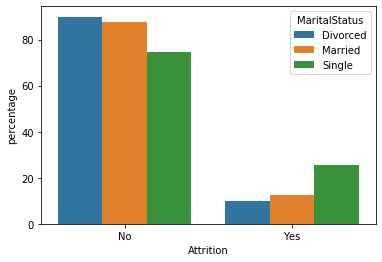

In [4]:
dept_counts = (df.groupby(['MaritalStatus'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('MaritalStatus'))
p = sns.barplot(x="Attrition", y="percentage", hue="MaritalStatus", data=dept_counts)

Insight:

Married people seem to have lower attrition, perhaps due to the fact that they need to live more "settled" lives.

On the contrary, unmarried employees, want to "better" their financial position and take more risks, perhaps leading to higher attrition.

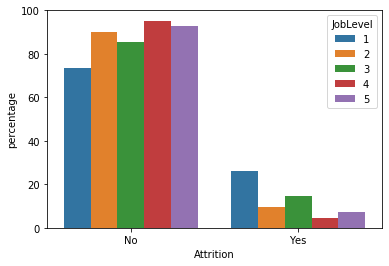

In [5]:
dept_counts = (df.groupby(['JobLevel'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('JobLevel'))
p = sns.barplot(x="Attrition", y="percentage", hue="JobLevel", data=dept_counts)

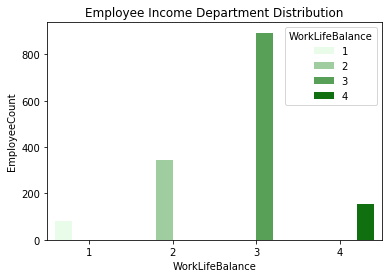

<Figure size 720x720 with 0 Axes>

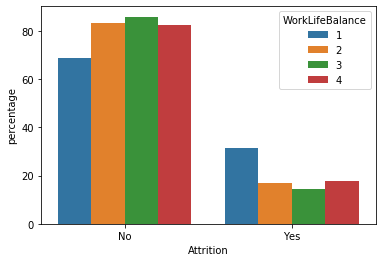

In [6]:
#sns.barplot(x='Attrition',y='EmployeeCount',hue='OverTime',data=df,color='green').set_title('Employee Income Department Distribution')
sns.barplot(x='WorkLifeBalance',y='EmployeeCount', hue='WorkLifeBalance',data=df,color='green', estimator=sum).set_title('Employee Income Department Distribution')
plt.figure(figsize=(10, 10))
plt.show()

dept_counts = (df.groupby(['WorkLifeBalance'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('WorkLifeBalance'))
p = sns.barplot(x="Attrition", y="percentage", hue="WorkLifeBalance", data=dept_counts)

Insight:

Employees who are rating WorkLifeBalance as Low seem to be very likely to leave the company (which is perhaps expected).

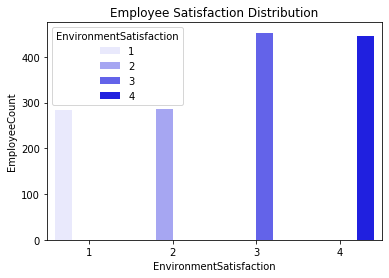

<Figure size 720x720 with 0 Axes>

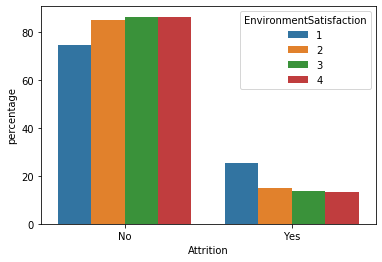

In [7]:
#sns.barplot(x='Attrition',y='EmployeeCount',hue='OverTime',data=df,color='green').set_title('Employee Income Department Distribution')
sns.barplot(x='EnvironmentSatisfaction',y='EmployeeCount', hue='EnvironmentSatisfaction',data=df,color='blue', estimator=sum).set_title('Employee Satisfaction Distribution')
plt.figure(figsize=(10, 10))
plt.show()

dept_counts = (df.groupby(['EnvironmentSatisfaction'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('EnvironmentSatisfaction'))
p = sns.barplot(x="Attrition", y="percentage", hue="EnvironmentSatisfaction", data=dept_counts)

Insight:
Employees dissatisfied with the environment are more likely to leave.

Also, when we look at the distribution of ratings given by employees, there seems to be an almost fair distribution of scores, with a bias being towards good environment satisfaction.

This could depend on the team in which the employee is, or the project he/she is working on.

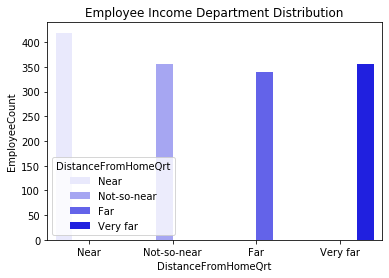

<Figure size 720x720 with 0 Axes>

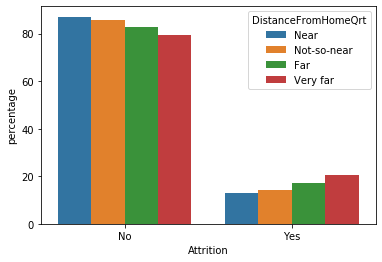

In [8]:
# Create buckets for Distance From Home
bin_labels_5 = ['Near', 'Not-so-near', 'Far', 'Very far']
df['DistanceFromHomeQrt'] = pd.qcut(df['DistanceFromHome'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels_5)

sns.barplot(x='DistanceFromHomeQrt',y='EmployeeCount', hue='DistanceFromHomeQrt',data=df,color='blue', estimator=sum).set_title('Employee Income Department Distribution')
plt.figure(figsize=(10, 10))
plt.show()

dept_counts = (df.groupby(['DistanceFromHomeQrt'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('DistanceFromHomeQrt'))
sns.barplot(x="Attrition", y="percentage", hue="DistanceFromHomeQrt", data=dept_counts)

Insight:
Employees staying farther seem to be more likely to leave. However, this factor doesn't seems to have a major impact upon attrition.

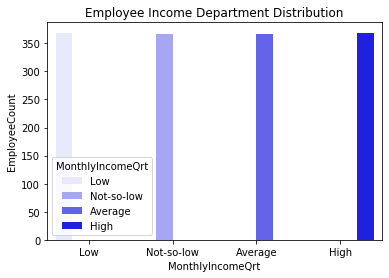

<Figure size 720x720 with 0 Axes>

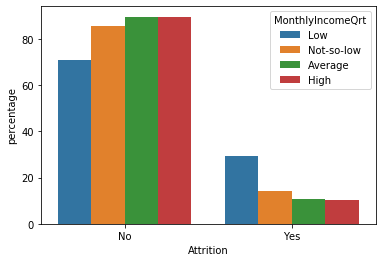

In [9]:
# Create buckets for Monthly Income
bin_labels_5 = ['Low', 'Not-so-low', 'Average', 'High']
df['MonthlyIncomeQrt'] = pd.qcut(df['MonthlyIncome'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels_5)

sns.barplot(x='MonthlyIncomeQrt',y='EmployeeCount', hue='MonthlyIncomeQrt',data=df,color='blue', estimator=sum).set_title('Employee Income Department Distribution')
plt.figure(figsize=(10, 10))
plt.show()

dept_counts = (df.groupby(['MonthlyIncomeQrt'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('MonthlyIncomeQrt'))
sns.barplot(x="Attrition", y="percentage", hue="MonthlyIncomeQrt", data=dept_counts)

Insight:
    There seems to be a very direct relation between the monthly income received by an employee and the attrition rate.
    People falling in the "Low" income category (last quartile of the income) seem to have quite a high attrition rate

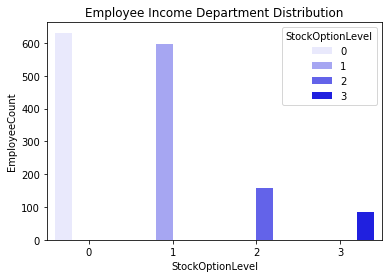

<Figure size 720x720 with 0 Axes>

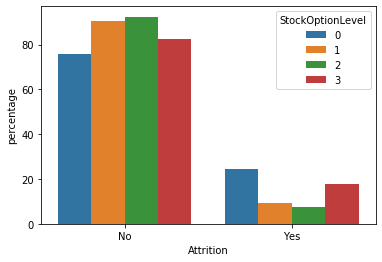

In [10]:
# Create buckets for Monthly Income
sns.barplot(x='StockOptionLevel',y='EmployeeCount', hue='StockOptionLevel',data=df,color='blue', estimator=sum).set_title('Employee Income Department Distribution')
plt.figure(figsize=(10, 10))
plt.show()

dept_counts = (df.groupby(['StockOptionLevel'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('StockOptionLevel'))
sns.barplot(x="Attrition", y="percentage", hue="StockOptionLevel", data=dept_counts)

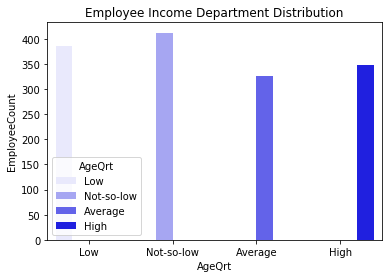

<Figure size 720x720 with 0 Axes>

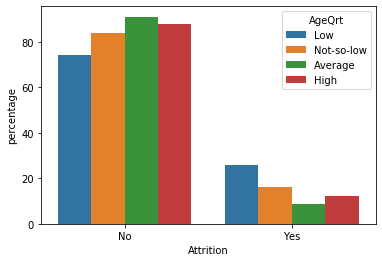

In [11]:
# Create buckets for Monthly Income
bin_labels_5 = ['Low', 'Not-so-low', 'Average', 'High']
df['AgeQrt'] = pd.qcut(df['Age'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels_5)

# Create buckets for Monthly Income
sns.barplot(x='AgeQrt',y='EmployeeCount', hue='AgeQrt',data=df,color='blue', estimator=sum).set_title('Employee Income Department Distribution')
plt.figure(figsize=(10, 10))
plt.show()

dept_counts = (df.groupby(['AgeQrt'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('AgeQrt'))
sns.barplot(x="Attrition", y="percentage", hue="AgeQrt", data=dept_counts)

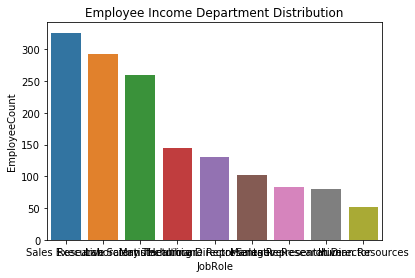

<Figure size 3600x3600 with 0 Axes>

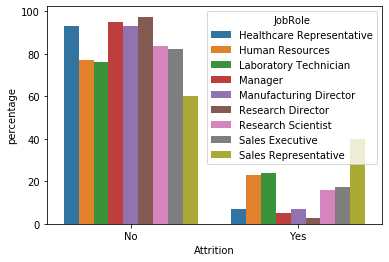

In [12]:
# Create buckets for Monthly Income
sns.barplot(x='JobRole',y='EmployeeCount',data=df, estimator=sum).set_title('Employee Income Department Distribution')
plt.figure(figsize=(50, 50))
plt.show()

dept_counts = (df.groupby(['JobRole'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('JobRole'))
sns.barplot(x="Attrition", y="percentage", hue="JobRole", data=dept_counts)

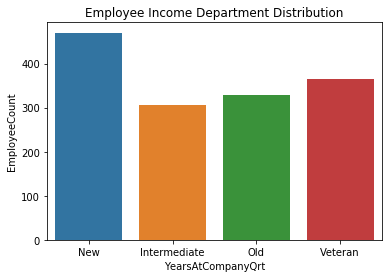

<Figure size 3600x3600 with 0 Axes>

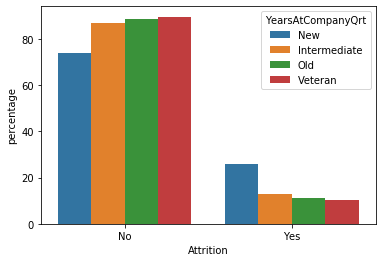

In [13]:
# Create buckets for Monthly Income
bin_labels_5 = ['New', 'Intermediate', 'Old', 'Veteran']
df['YearsAtCompanyQrt'] = pd.qcut(df['YearsAtCompany'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels_5)

# Create buckets for Monthly Income
sns.barplot(x='YearsAtCompanyQrt',y='EmployeeCount',data=df, estimator=sum).set_title('Employee Income Department Distribution')
plt.figure(figsize=(50, 50))
plt.show()

dept_counts = (df.groupby(['YearsAtCompanyQrt'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('YearsAtCompanyQrt'))
sns.barplot(x="Attrition", y="percentage", hue="YearsAtCompanyQrt", data=dept_counts)

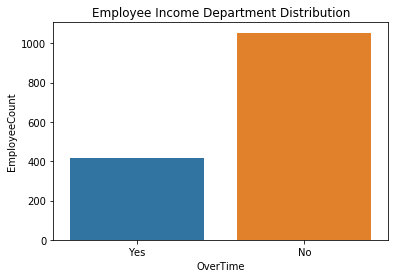

<Figure size 3600x3600 with 0 Axes>

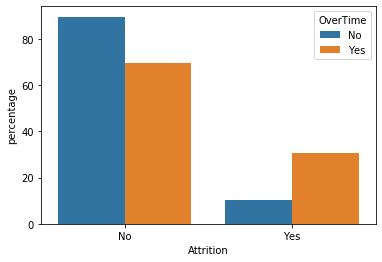

In [14]:
sns.barplot(x='OverTime',y='EmployeeCount',data=df, estimator=sum).set_title('Employee Income Department Distribution')
plt.figure(figsize=(50, 50))
plt.show()

dept_counts = (df.groupby(['OverTime'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('OverTime'))
sns.barplot(x="Attrition", y="percentage", hue="OverTime", data=dept_counts)

Insight:

Employees who are working over-time are having higher attrition rate. This seems that employees who are working over-time are doing so due to compulsion, and less likely due to their own will.

This may depend on the job role or the project they are in.

**ANOVA Analysis**

In [16]:
dept_counts

,OverTime,Attrition,percentage
0,No,No,89.563567
1,No,Yes,10.436433
2,Yes,No,69.471154
3,Yes,Yes,30.528846


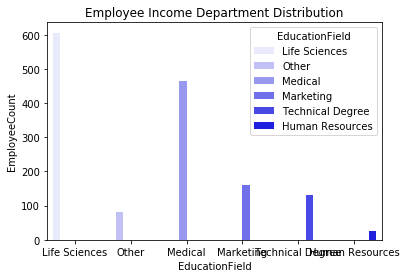

<Figure size 720x720 with 0 Axes>

In [17]:
#sns.barplot(x='Attrition',y='EmployeeCount',hue='OverTime',data=df,color='green').set_title('Employee Income Department Distribution')
sns.barplot(x='EducationField',y='EmployeeCount', hue='EducationField',data=df,color='blue', estimator=sum).set_title('Employee Income Department Distribution')
plt.figure(figsize=(10, 10))
plt.show()

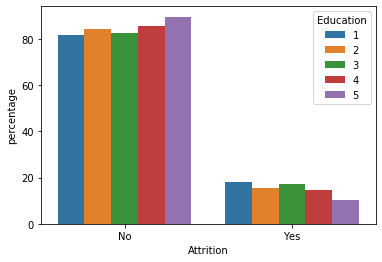

In [18]:
dept_counts = (df.groupby(['Education'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Education'))
p = sns.barplot(x="Attrition", y="percentage", hue="Education", data=dept_counts)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Trying Logistic Regression
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
#Selecting numeric paremeters for Feature Engineering
df3=df[['JobLevel','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','Attrition']]


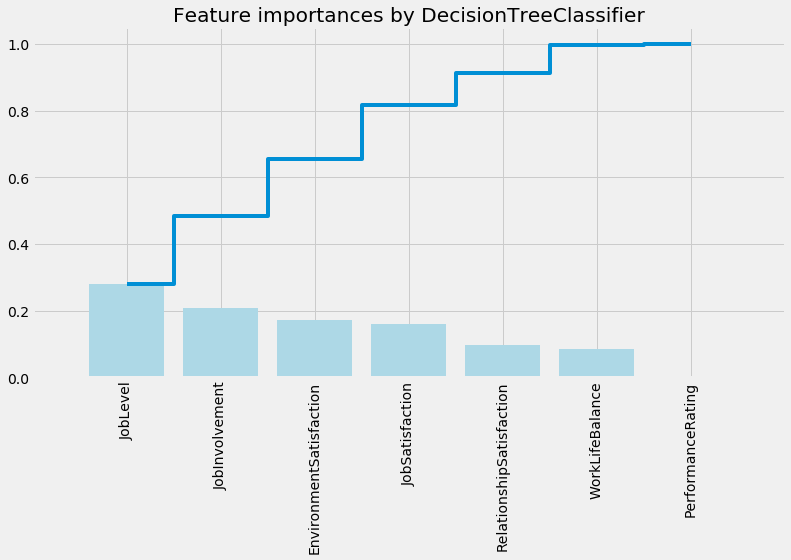

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Create train and test splits
target_name = 'Attrition'
X = df3.drop('Attrition', axis=1)

y=df3[target_name]
X_train,X_test,y_train,t_test=train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df3.drop(['Attrition'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()


In [9]:
df=pd.read_csv("C:/Users/ASHRITHA/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
df2 = df.select_dtypes(include=['object']).drop('Attrition', axis=1)

In [11]:
df2.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [12]:
# Perform One-Hot Encoding Of Categorical variables
df = pd.get_dummies(df, columns=df2.columns, drop_first=True)

In [13]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,Yes,1102,1,2,1,1,2,94,3,...,0,0,0,0,0,1,0,0,1,1
1,49,No,279,8,1,1,2,3,61,2,...,0,0,0,0,1,0,0,1,0,0
2,37,Yes,1373,2,2,1,4,4,92,2,...,1,0,0,0,0,0,0,0,1,1
3,33,No,1392,3,4,1,5,4,56,3,...,0,0,0,0,1,0,0,1,0,1
4,27,No,591,2,1,1,7,1,40,3,...,1,0,0,0,0,0,0,1,0,0


In [14]:
# Create an intercept term for the logistic regression equation
#df['value'] = 1
indep_var = ['JobLevel','JobInvolvement','EnvironmentSatisfaction','value', 'Attrition']
#df = df[indep_var]

# Create train and test splits
target_name = 'Attrition'
X = df.drop('Attrition', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
639,49,1418,1,3,1,887,3,36,3,1,...,0,0,0,0,1,0,0,1,0,0
1019,36,329,16,4,1,1436,3,98,2,2,...,0,0,0,0,0,1,0,1,0,0
1389,31,1125,1,3,1,1956,4,48,1,2,...,0,0,0,0,1,0,0,1,0,0
1392,35,1224,7,4,1,1962,3,55,3,2,...,0,0,0,0,0,1,0,1,0,1
1347,36,1213,2,1,1,1890,2,94,2,2,...,0,0,0,0,0,0,0,0,1,0


In [15]:
# Using 10 fold Cross-Validation to train Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

AUC: 0.820 (0.080)


In [16]:
# Using 10 fold Cross-Validation to train Decision Tree Model
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = DecisionTreeClassifier(class_weight = "balanced",min_weight_fraction_leaf=0.01)
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))


AUC: 0.729 (0.058)


In [18]:
# Using 10 fold Cross-Validation to train Random Forest Model
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier(n_estimators=1000,max_depth=None,min_samples_split=10,class_weight="balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))


AUC: 0.794 (0.076)
